<a href="https://colab.research.google.com/github/annaouyang/hello-world/blob/master/Copy_of_UNIV_3360_Supervised_Learning_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Homework

In this assignment, you will get hand-on experience using a few supervised learning models on a variety of different datasets. Refer to the lecture slides on Brightspace for explainations of the supervised learning algorithms and the in-class example notebooks for examples on how to use Python and Scikit-learn for supervised learning. In addition, here are the links to scikit-learn documentation which may be helpful throughout this homework:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

np.set_printoptions(suppress=True)
np.random.seed(345)

# Regression

## Dataset

For this assignment, we will be working with data collected from the US census about the frequency of violent crimes in different regions. In this data, we are attempting to predict the number of required of violent crimes per 100,000 citizens in an area based on a variety of census data.

We can use Pandas to load the data from CSV file by running the cell below.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/univ-3360-vu-smartcities/example-notebooks/master/datasets/regression/crime_data.csv")
data.head()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,...,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,...,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,20000
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,...,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,67000
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,...,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,43000
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,...,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,12000
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,...,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,3000


In the cell below, extract the columns which represent the features to a variable called *X* and the column which represents the target value (ViolentCrimesPerPop) to a variable called *y*.

In [0]:
X = data.drop(columns='ViolentCrimesPerPop')
y = data['ViolentCrimesPerPop']

Prepare a training and testing split of the data above, reserving 20% of the full data for testing.




In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Linear Regression

In the cell below, create and train a linear regression model which uses the prepared training data to learn ViolentCrimesPerPop using the other features. Print the coefficients of the linear model.

In [5]:
from sklearn import linear_model

# create and train linear model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# print coefficients of linear model
print("Coefficients: ", model.coef_)

Coefficients:  [   -69.7967151    -101.6707585   24353.6466662    6083.75339282
  23920.20190477  -4612.177403     1057.55407454   6547.77664361
  18097.70855059 -30058.79998484 -10111.29751469   7689.69631164
 -22670.35375975   4034.41680108 -12819.38259502 -18873.50467316
   3571.32437807 -12857.91045164  10115.28380685   3600.66358026
  -8316.38285745  13468.3452144   28288.98665212 -44874.04289175
  -3953.84647819  -3010.97774817   4149.74531075   3708.56969968
   3395.03364832   4110.93904922 -15747.90332888  -1037.80782522
  -3465.82332891    918.70055152   4693.48360093  38598.8411851
  -4655.99367098  -7392.17170365   3501.69104468  17263.6891501
  43503.01660371  23144.11004303  11738.43232052 -48642.03823227
 -17521.48097595   1636.02051572 -25158.12785981  -2816.6688247
  -1144.43646293   4501.63229944 -19712.22571025 -17911.20149696
  15512.92092331 -15792.99669158   5221.7452579    2263.15099502
  -9264.05643028   7545.11103805  -9462.30376295  -5580.80077906
  22346.94829

Evaluate the linear model on both the training data and testing data using the mean squared error, root mean squared error, and R2 coefficient metrics and print the results.

In [6]:
from sklearn.metrics import r2_score, mean_squared_error

# evaluate linear model on TRAINING data (MSE, RMSE, and R^2)
training_data_predictions = model.predict(X_train)
print("Evaluating linear regression model on TRAINING data:")
print("Mean squared error: %.2f" % mean_squared_error(y_train, training_data_predictions))
print("Root mean squared error: %.2f" % mean_squared_error(y_train, training_data_predictions, squared=False))
print("R^2 Score: %.2f" % r2_score(y_train, training_data_predictions))

# evaluate linear model on TESTING data (MSE, RMSE, and R^2)
testing_data_predictions = model.predict(X_test)
print("\nEvaluating linear regression model on TESTING data:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, testing_data_predictions))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, testing_data_predictions, squared=False))
print("R^2 Score: %.2f" % r2_score(y_test, testing_data_predictions))

Evaluating linear regression model on TRAINING data:
Mean squared error: 157626929.84
Root mean squared error: 12554.96
R^2 Score: 0.71

Evaluating linear regression model on TESTING data:
Mean squared error: 208048749.95
Root mean squared error: 14423.90
R^2 Score: 0.59


**Question:** Do you think that simple linear regression is a good model of the crime data? Explain your reasoning.

**Answer:** 

No, simple linear regression is not a good model of the crime data. On unseen data (i.e., testing data), the model only captures 59% of the variability seen in the # of violent crimes per 100,000 citizens. Furthermore, on average, the model over or underpredicts the root squared error of the # of violent crimes per 100,000 citizens by 14,423.90. Hopefully, we can find model that fits the crime data better. 

## Lasso Regression

Create and train a lasso regression model for the violent crime data for various different values of alpha. For each model, print the coefficients and evaluate the model on both the training and testing data using the mean squared error, root mean squared error, and R2 score metrics. The different values you should use for alpha are defined in the cell below. Ensure that the results for each model are labeled with the alpha value that generated them.

*Hint:* If you use some of the control-flow elements of Python, you only need to write the code for this one time instead of for all alpha values.

In [0]:
alpha_values = [0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]


In [0]:
def eval_lasso_regression_model(alpha_val, X_train, X_test, y_train, y_test):
  # create and train model
  model = linear_model.Lasso(alpha=alpha_val, max_iter=1e5)
  model.fit(X_train, y_train)
  print("**********************************************************")
  print("When alpha is set at %.3f:" % alpha_val)

  # print coefficients
  print("Coefficients:", model.coef_)

  # evaluate model on TRAINING data (MSE, RMSE, and R^2)
  training_data_predictions = model.predict(X_train)
  print("Evaluating lasso regression model on TRAINING data:")
  print("Mean squared error: %.2f" % mean_squared_error(y_train, training_data_predictions))
  print("Root mean squared error: %.2f" % mean_squared_error(y_train, training_data_predictions, squared=False))
  print("R^2 Score: %.2f" % r2_score(y_train, training_data_predictions))

  # evaluate linear model on TESTING data (MSE, RMSE, and R^2)
  testing_data_predictions = model.predict(X_test)
  print("\nEvaluating lasso regression model on TESTING data:")
  print("Mean squared error: %.2f" % mean_squared_error(y_test, testing_data_predictions))
  print("Root mean squared error: %.2f" % mean_squared_error(y_test, testing_data_predictions, squared=False))
  print("R^2 Score: %.2f" % r2_score(y_test, testing_data_predictions))
  print("**********************************************************")
  print("\n\n")


In [9]:
for a in alpha_values:
  eval_lasso_regression_model(a, X_train, X_test, y_train, y_test)

**********************************************************
When alpha is set at 0.125:
Coefficients: [   -70.1579348    -103.36314128  19752.48643167   5915.02762245
  23927.17041398  -4609.29124104   1090.25694888   6557.49765321
  17519.91343844 -30436.5806326   -9191.54190826   7443.52589482
 -18191.53548299   3895.23201219 -11470.53761684 -18855.17430361
   3542.1979114  -12794.031614    10069.86975316   3587.94307346
  -8236.099055    12450.13341848  27737.1602341  -44465.32257423
  -3939.63390372  -2982.87768477   4156.79490356   3724.97453276
   3361.61043033   3828.98338121 -15646.70669611  -1136.29476221
  -3262.53509207    887.19586724   4621.22064832  38427.84506453
  -4633.6168088   -7351.68913987   3510.12841494  17179.1729147
  40346.42870952  23070.92759499   7715.85634141 -41852.37607913
 -16955.65976616   1216.63230729 -24561.93346743  -2837.96453674
  -1160.83691284   4443.12364282 -19668.50691364 -17651.22495895
  15519.83258566 -15596.76371626   5251.04549427   1964

**Question:** What is happening to the coefficients as the value of alpha changes?

**Answer:**

When alpha = 0, you get the same results (coefficients, MSE, RMSE, R^2) as linear regression. As alpha increases, the number of coefficients set to 0 increases as well. 

**Question:** How do the changes in coefficients affect to the model which is created?

**Answer:**
The changes in coefficients produced by Lasso regression help us prevent overfitting of our model. The Lasso regression technique allows us to select for more important features in the model while filtering out the less important features (by setting their coefficients to 0). However, it is important to select an appropriate alpha because if alpha is too high, then our model may actually underfit the data.

**Question:** Based on the results above, which value of alpha do you believe is best for this dataset? Explain your answer.

**Answer:** Based on the results above, the best value of alpha for the dataset is 32. However, I also looked at some other documentation that mentioned the following visualization tool to help find alpha. If I understand this correctly, it is showing that optimal alpha = approx. 128.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f433e689278>,
               model=None)

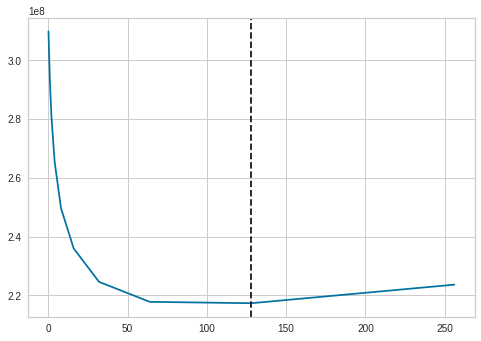

In [10]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Instantiate the linear model and visualizer
alpha_values_2 = [0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
model = LassoCV(alphas=alpha_values_2, max_iter=1e4)
visualizer = AlphaSelection(model)
visualizer.fit(X_test, y_test)

**Question:** For the violent crime dataset, do you believe that simple linear regression or lasso regression works better? Explain your answer.

**Answer:** Lasso regression works better because it helped us reduce model error slightly as measured by MSE, RMSE, and R^2. 

**Question:** Generally for any dataset, why would we use lasso regression as opposed to simple linear regression?

**Answer:** Lasso regression helps us reduce overfitting and identifies the most important features. 

# Support Vector Machine

In this section, we will implement a support vector machine to perform classification.

## Dataset

For this assignment, we will be using data that is generated using scikit-learn called the moon data. It is a relatively common dataset that is often used to test classification and clustering algorithms. Run the cell below to generate the data.

In [11]:
moons = make_moons(500, noise=0.1)
data = pd.DataFrame(moons[0], columns=['X_coordinate', 'Y_coordinate'])
data['label'] = moons[1]
data.head()

,X_coordinate,Y_coordinate,label
0,1.205479,-0.442756,1
1,0.749424,-0.532305,1
2,1.989919,0.303683,1
3,-0.165585,0.927264,0
4,0.287603,-0.370177,1


Once we have generated the data, we can plot it using colors to represent the labels and get a good picture of the data and why it is called "moons".

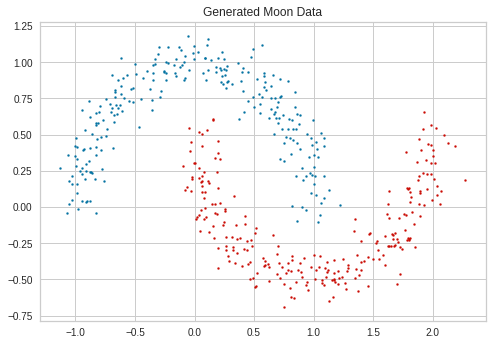

In [12]:
label_0 = data[data['label']==0]
label_1 = data[data['label']==1]
plt.scatter(label_0['X_coordinate'], label_0['Y_coordinate'], color='b', s=4)
plt.scatter(label_1['X_coordinate'], label_1['Y_coordinate'], color='r', s=4)
plt.title("Generated Moon Data")
plt.show()

In the cell below, extract the columns which represent the features to a variable called *X* and the column which represents the target value (label) to a variable called *y*.

In [0]:
X = data[['X_coordinate','Y_coordinate']]
y = data['label']

Prepare a training and testing split of the data above, reserving 20% of the full data for testing.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Linear Support Vector Machine

In the cell below, create a support vector classifier which uses the linear kernel and train it on the training data from above. Name the variable for your classifier *linear_clf*.

In [15]:
linear_clf = SVC(kernel='linear')
linear_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluate the linear SVM using the accuracy, precision, recall, and F1 metrics for both the training and testing data and print the results.



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

training_predictions = linear_clf.predict(X_train)
print("Evaluating Linear SVM on TRAINING data:")
print("Accuracy Score:\t %.2f" % accuracy_score(y_train, training_predictions))
print("Precision Score: %.2f" % precision_score(y_train, training_predictions))
print("Recall Score:\t %.2f" % recall_score(y_train, training_predictions))
print("F1 Score:\t %.2f" % f1_score(y_train, training_predictions))

test_predictions = linear_clf.predict(X_test)
print("\nEvaluating Linear SVM on TESTING data:")
print("Accuracy Score:\t %.2f" % accuracy_score(y_test, test_predictions))
print("Precision Score: %.2f" % precision_score(y_test, test_predictions))
print("Recall Score:\t %.2f" % recall_score(y_test, test_predictions))
print("F1 Score:\t %.2f" % f1_score(y_test, test_predictions))



Evaluating Linear SVM on TRAINING data:
Accuracy Score:	 0.89
Precision Score: 0.89
Recall Score:	 0.87
F1 Score:	 0.88

Evaluating Linear SVM on TESTING data:
Accuracy Score:	 0.88
Precision Score: 0.89
Recall Score:	 0.89
F1 Score:	 0.89


**Question:** Do you think that a linear SVM classifier works well for the moon data? Explain your reasoning.

**Answer:**
The linear SVM classifier works pretty well (but it could be improved upon).

For our testing data:
- 83% of our predictions were accurate
- we have a relatively low false positive rate with a precision score of 0.78
- we have a relatively high recall rate of 0.89

Run the cell below to plot the decision boundary that the linear SVM learned on the moon data. 

**Important:** Your variables must have been named as specified in order for this cell to work.

*Note:* It is NOT important that you understand how this code works. You should focus on interpretting the plot, not the code which generated it.

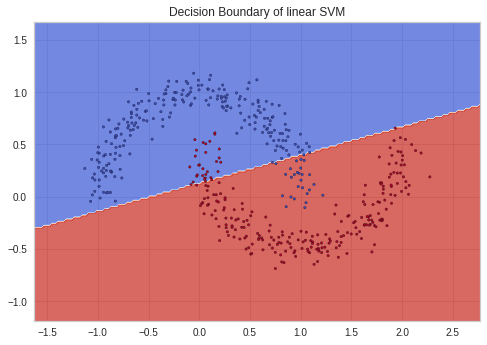

In [17]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Decision Boundary of linear SVM')

X0, X1 = data['X_coordinate'], data['Y_coordinate']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, linear_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=6, edgecolors='k')
ax.set_title(title)
plt.show()

**Question:** What is going on in the plot above? Why did the SVM create a decision boundary like this?

**Answer:**
The plot shows the decision boundary of our linear SVM. All points in the red area will be classified as one group, while all points in the blue area will be classified as another group. The SVM created a linear decision boundary because we created a linear SVM model; this is the linear decision boundary that maximizes the margin (distance).

**Question:** Why was this SVM not able to draw a decision boundary that accurately reflects the moons?

**Answer:** Since we created a linear SVM, it did the best it could with a single line in 2D space (n-D space uses a hyperplane).

## Kernel Support Vector Machine

Now we will focus our attention on designing a classifier which can more accurately classify the moon data by applying the kernel trick.

**Question:** In your own words, explain what is the kernel trick?

**Answer:** The kernel trick is a trick for calculating the dot product between the data points in a higher-dimensional space. In this manner, it allows us to create what looks like a non-linear classifier by creating a linear classifier in a higher-dimensional space. 

For example, something that is not linearly separable in 2D space may be linearly separable in 3D or 4D space. By taking advantage of dot products, the kernel trick allows us to find this hyperplane without actually computing the coordinates of the data in 3D or 4D space.

In the cell below, create a support vector classifier which uses the RBF kernel and train it on the moon training data. Name the variable for your classifier *rbf_clf*.

In [18]:
rbf_clf = SVC() # rbf is default kernel
rbf_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluate the linear SVM using the accuracy, precision, recall, and F1 metrics for both the training and testing data and print the results.

In [19]:
training_predictions = rbf_clf.predict(X_train)
print("Evaluating RBF Kernel SVM on TRAINING data:")
print("Accuracy Score:\t %.2f" % accuracy_score(y_train, training_predictions))
print("Precision Score: %.2f" % precision_score(y_train, training_predictions))
print("Recall Score:\t %.2f" % recall_score(y_train, training_predictions))
print("F1 Score:\t %.2f" % f1_score(y_train, training_predictions))

test_predictions = rbf_clf.predict(X_test)
print("\nEvaluating RBF Kernel SVM on TESTING data:")
print("Accuracy Score:\t %.2f" % accuracy_score(y_test, test_predictions))
print("Precision Score: %.2f" % precision_score(y_test, test_predictions))
print("Recall Score:\t %.2f" % recall_score(y_test, test_predictions))
print("F1 Score:\t %.2f" % f1_score(y_test, test_predictions))

Evaluating RBF Kernel SVM on TRAINING data:
Accuracy Score:	 0.99
Precision Score: 0.99
Recall Score:	 0.99
F1 Score:	 0.99

Evaluating RBF Kernel SVM on TESTING data:
Accuracy Score:	 1.00
Precision Score: 1.00
Recall Score:	 1.00
F1 Score:	 1.00


**Question:** Why is the kernel support vector machine classifying the data much better than the linear SVM?

**Answer:** It gives us more than 2 dimensions to work with in which to find a linear classifier. Thus, our hyperplane can work in a higher dimensional space which allows for a better margin. 

Run the cell below to plot the decision boundary that the RBF SVM learned on the moon data. 

**Important:** Your variables must have been named as specified in order for this cell to work.

*Note:* It is NOT important that you understand how this code works. You should focus on interpretting the plot, not the code which generated it.

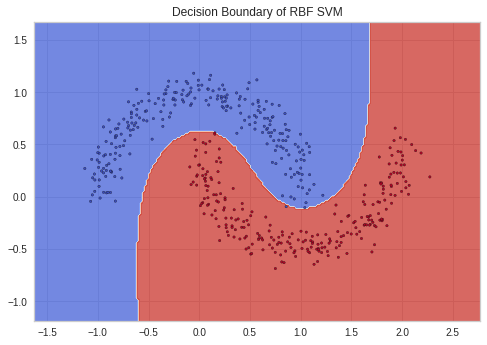

In [20]:
fig, ax = plt.subplots()
rbf_title = ('Decision Boundary of RBF SVM')

X0, X1 = data['X_coordinate'], data['Y_coordinate']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbf_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=6, edgecolors='k')
ax.set_title(rbf_title)
plt.show()

**Question:** Explain how the decision boundary changed from the linear SVM why it did so.

**Answer:** It changed to a non-linear decision boundary because it could find a better linear decision boundary in higher dimensional space (i.e., hyperplane). Mapped onto the original 2 dimensions, it looks nonlinear. 

**Question:** What are the advantages to using a kernel SVM compared to a linear SVM? Are there any disadvantages?

**Answer:** Kernel SVMs tend to find better decision boundaries (i.e., produce less error). However, they are computationally intensive and require a lot of power/time, especially when # of observations and/or features are large.

**Question:** Under what circumstances should you use a linear SVM and under what circumstances should you a kernel SVM instead?

**Answer:**

This is a rule of thumb that I found from Andrew Ng (https://www.youtube.com/watch?v=hDh7jmEGoY0): 
- when # of features >>> # of observations, use a linear SVM
- when # of features <<< # of observations, use a RBF SVM
- if # of observations are really large (50,000+), try to create more features and use linear SVM